In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def viz_charts(file_kb,file_voice):
    df1 = pd.read_csv(file_kb)
    df2 = pd.read_csv(file_voice)
    
    df1= df1.iloc[:,0:3]
    df2= df2.iloc[:,0:3]
    
    
    ax = df1.plot(figsize = (10,6))
    ax.set_xlabel('frames at 10 fps')
    ax.set_ylabel('activation values')
    ax.set_title('KEYBOARD INPUT')
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
    ax = df2.plot(figsize = (10,6))
    ax.set_xlabel('frames at 10 fps')
    ax.set_ylabel('activation values')
    ax.set_title('VOICE INPUT')
    ax.get_legend().set_bbox_to_anchor((1, 1))
    
    print("Mean Keyboard Values")
    print(df1.mean(axis=0))
    print("\n")
    
    print("Mean Voice Values")
    print(df2.mean(axis=0))

    

Mean Keyboard Values
joyLevel            7.584120
 sadnessLevel       0.106408
 engagementLevel    5.082804
dtype: float64


Mean Voice Values
joyLevel            21.997671
 sadnessLevel        0.008250
 engagementLevel    20.106796
dtype: float64


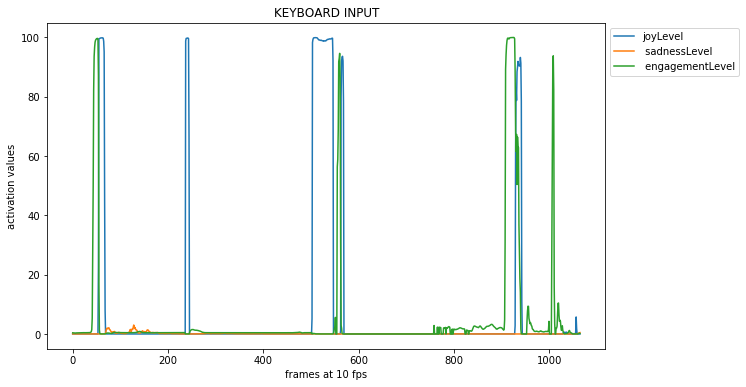

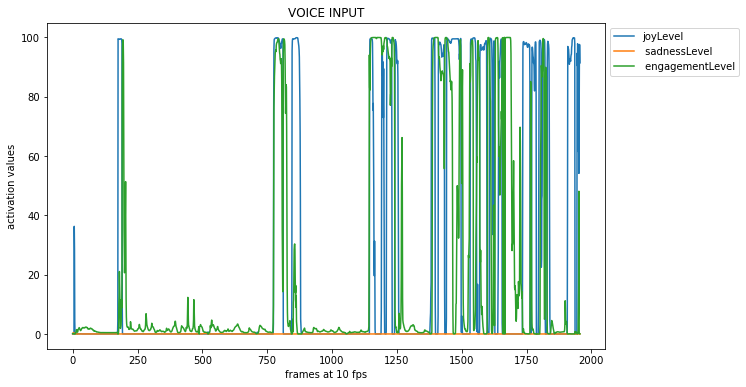

In [3]:
viz_charts('Summaries/ExpressionSummary_2_kb.txt','Summaries/ExpressionSummary_2_voice.txt')

In [4]:
import os
def combine_files():
    df_voice = pd.DataFrame()
    df_kb = pd.DataFrame()
    directory = os.fsencode('../OverVoice/Summaries/')

    for file in os.listdir(directory):
        filename = "Summaries/"+os.fsdecode(file)
        print(filename)
        if "kb" in filename:
#             print(os.path.join(directory,file))
            df_kb = df_kb.append(pd.read_csv(filename))
        elif "voice" in filename:
#             print(os.path.join(directory,file))
            df_voice = df_voice.append(pd.read_csv(filename))
            
    return df_kb,df_voice

In [5]:
df_kb,df_voice = combine_files()

Summaries/ExpressionSummary_1_kb.txt
Summaries/ExpressionSummary_1_voice.txt
Summaries/ExpressionSummary_2_kb.txt
Summaries/ExpressionSummary_2_voice.txt
Summaries/ExpressionSummary_3_kb.txt
Summaries/ExpressionSummary_3_voice.txt
Summaries/ExpressionSummary_4_kb.txt
Summaries/ExpressionSummary_4_voice.txt
Summaries/ExpressionSummary_5_kb.txt
Summaries/ExpressionSummary_5_voice.txt


In [6]:
df_kb.head()

,joyLevel,sadnessLevel,engagementLevel,disgustLevel
0,0.001808,0.034481,0.426517,0.081265
1,0.001813,0.028776,0.425904,0.080735
2,0.001813,0.030603,0.424297,0.081141
3,0.001819,0.029798,0.417516,0.081613
4,0.001827,0.039134,0.413646,0.082078


In [7]:
df_voice.head()

,joyLevel,sadnessLevel,engagementLevel,disgustLevel
0,0.001857,0.023551,0.436209,0.082041
1,0.001851,0.023567,0.432061,0.081947
2,0.001840,0.023686,0.428979,0.081576
3,0.001836,0.023741,0.428181,0.081882
4,0.001835,0.024074,0.427578,0.081605


In [8]:
df_kb.shape

(4500, 4)

In [9]:
df_voice.shape

(7119, 4)

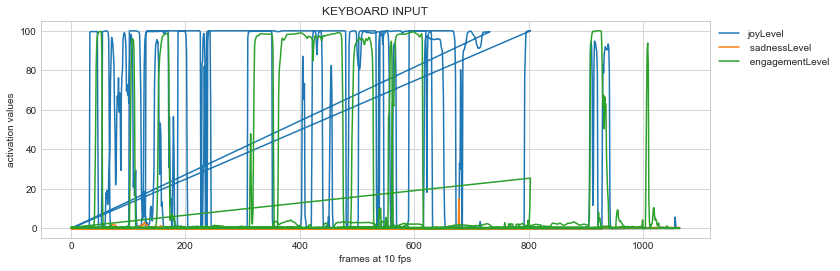

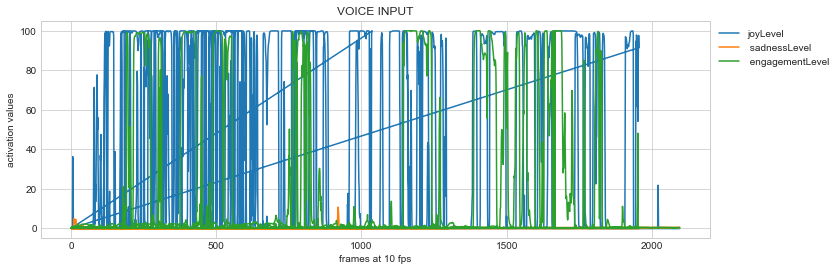

In [39]:
df_kb= df_kb.iloc[:,0:3]
df_voice= df_voice.iloc[:,0:3]
    
    
ax = df_kb.plot(figsize = (12,4))
ax.set_xlabel('frames at 10 fps')
ax.set_ylabel('activation values')
ax.set_title('KEYBOARD INPUT')
ax.get_legend().set_bbox_to_anchor((1, 1))
    
ax = df_voice.plot(figsize = (12,4))
ax.set_xlabel('frames at 10 fps')
ax.set_ylabel('activation values')
ax.set_title('VOICE INPUT')
ax.get_legend().set_bbox_to_anchor((1, 1))

In [11]:
df_kb.mean(axis=0)

joyLevel            21.721043
 sadnessLevel        0.038987
 engagementLevel     7.317867
dtype: float64

In [12]:
df_temp_voice = df_voice.iloc[:4500,:]

In [13]:
df_temp_voice.mean(axis=0)

joyLevel            18.906630
 sadnessLevel        0.023906
 engagementLevel    11.815133
dtype: float64

In [14]:
df_voice.mean(axis=0)

joyLevel            25.972184
 sadnessLevel        0.023924
 engagementLevel     9.195895
dtype: float64

In [15]:
df_kb.describe()

,joyLevel,sadnessLevel,engagementLevel
count,4500.000000,4500.000000,4500.000000
mean,21.721043,0.038987,7.317867
std,40.242525,0.273897,24.000612
min,0.000000,0.000000,0.000000
25%,0.001829,0.000029,0.210048
50%,0.002740,0.006130,0.427775
75%,0.913563,0.023409,0.798983
max,99.930590,14.949330,99.959240


In [16]:
df_voice.describe()

,joyLevel,sadnessLevel,engagementLevel
count,7119.000000,7119.000000,7119.000000
mean,25.972184,0.023924,9.195895
std,42.188978,0.255898,25.981709
min,0.000000,0.000000,0.000000
25%,0.002084,0.000045,0.206456
50%,0.006654,0.002683,0.518661
75%,73.799655,0.017323,1.486543
max,99.930240,10.815640,99.999930


### Statistical Analyses

In [17]:
from scipy import stats

In [18]:
df_voice.shape

(7119, 3)

In [19]:
df_kb.shape

(4500, 3)

In [40]:
stats.ttest_rel(df_voice.iloc[:4500,0].values,df_kb.iloc[:,0].values,axis=0)

Ttest_relResult(statistic=-3.1534491972382575, pvalue=0.001624154477712293)

scipy.stats.ttest_rel(a, b, axis=0)
Calculates the T-test on TWO RELATED samples of scores, a and b.

Examples for the use are scores of the same set of student in different exams, or repeated sampling from the same units. The test measures whether the average score differs significantly across samples (e.g. exams). If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

In [41]:
stats.ttest_rel(df_voice.iloc[:4500,2].values,df_kb.iloc[:,2].values,axis=0)

Ttest_relResult(statistic=7.6756590520222945, pvalue=2.0053853924508754e-14)

### Barplots

In [22]:
mean_df = pd.DataFrame({'mean':[df_kb.iloc[:4500,0].values.mean(),df_voice.iloc[:4500,0].values.mean()]})

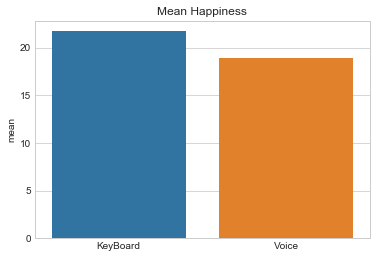

In [23]:
sns.set_style("whitegrid")
sns.barplot(x=['KeyBoard','Voice'], y = 'mean',data=mean_df).set_title('Mean Happiness')

In [24]:
mean_df = pd.DataFrame({'mean':[df_kb.iloc[:4500,2].values.mean(),df_voice.iloc[:4500,2].values.mean()]})

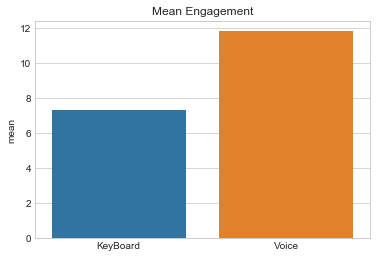

In [37]:
sns.set_style("whitegrid")
sns.barplot(x=['KeyBoard','Voice'], y = 'mean',data=mean_df).set_title('Mean Engagement')

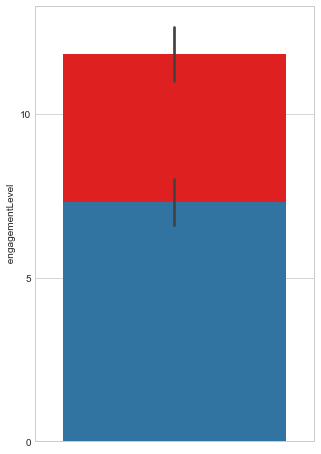

In [35]:
plt.subplots(figsize=(5,8))
plt.yticks(np.arange(0, df_voice.iloc[:,2].values.max(), 5))
sns.barplot(y = df_voice.iloc[:4500,2],color='red',estimator=np.mean)
sns.barplot(y = df_kb.iloc[:,2],estimator=np.mean)

In [ ]:
plt.subplots(figsize=(5,6))
plt.yticks(np.arange(0, df_voice.iloc[:,2].values.max()+20, 10))
sns.violinplot(y = df_voice,color='red')
sns.violinplot(y = vid2_dataset)